In [1]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
#cargar y explorar datos 
data = pd.read_csv("C:/Users/SAMSUNG/Downloads/SEMESTRE OCTAVO/ANALISIS DE DATOS/TAREA 3/heart_cleveland_upload.csv")
print(data.head())
print(data.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

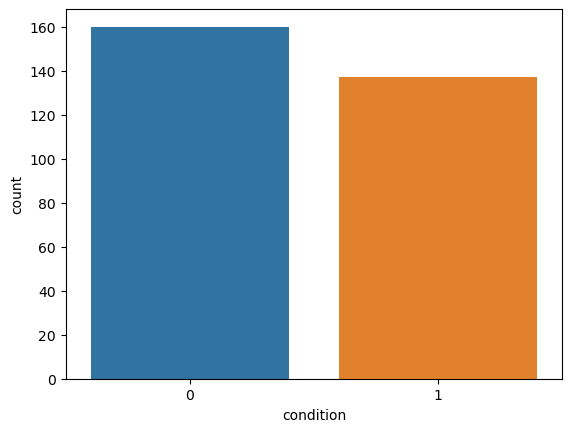

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

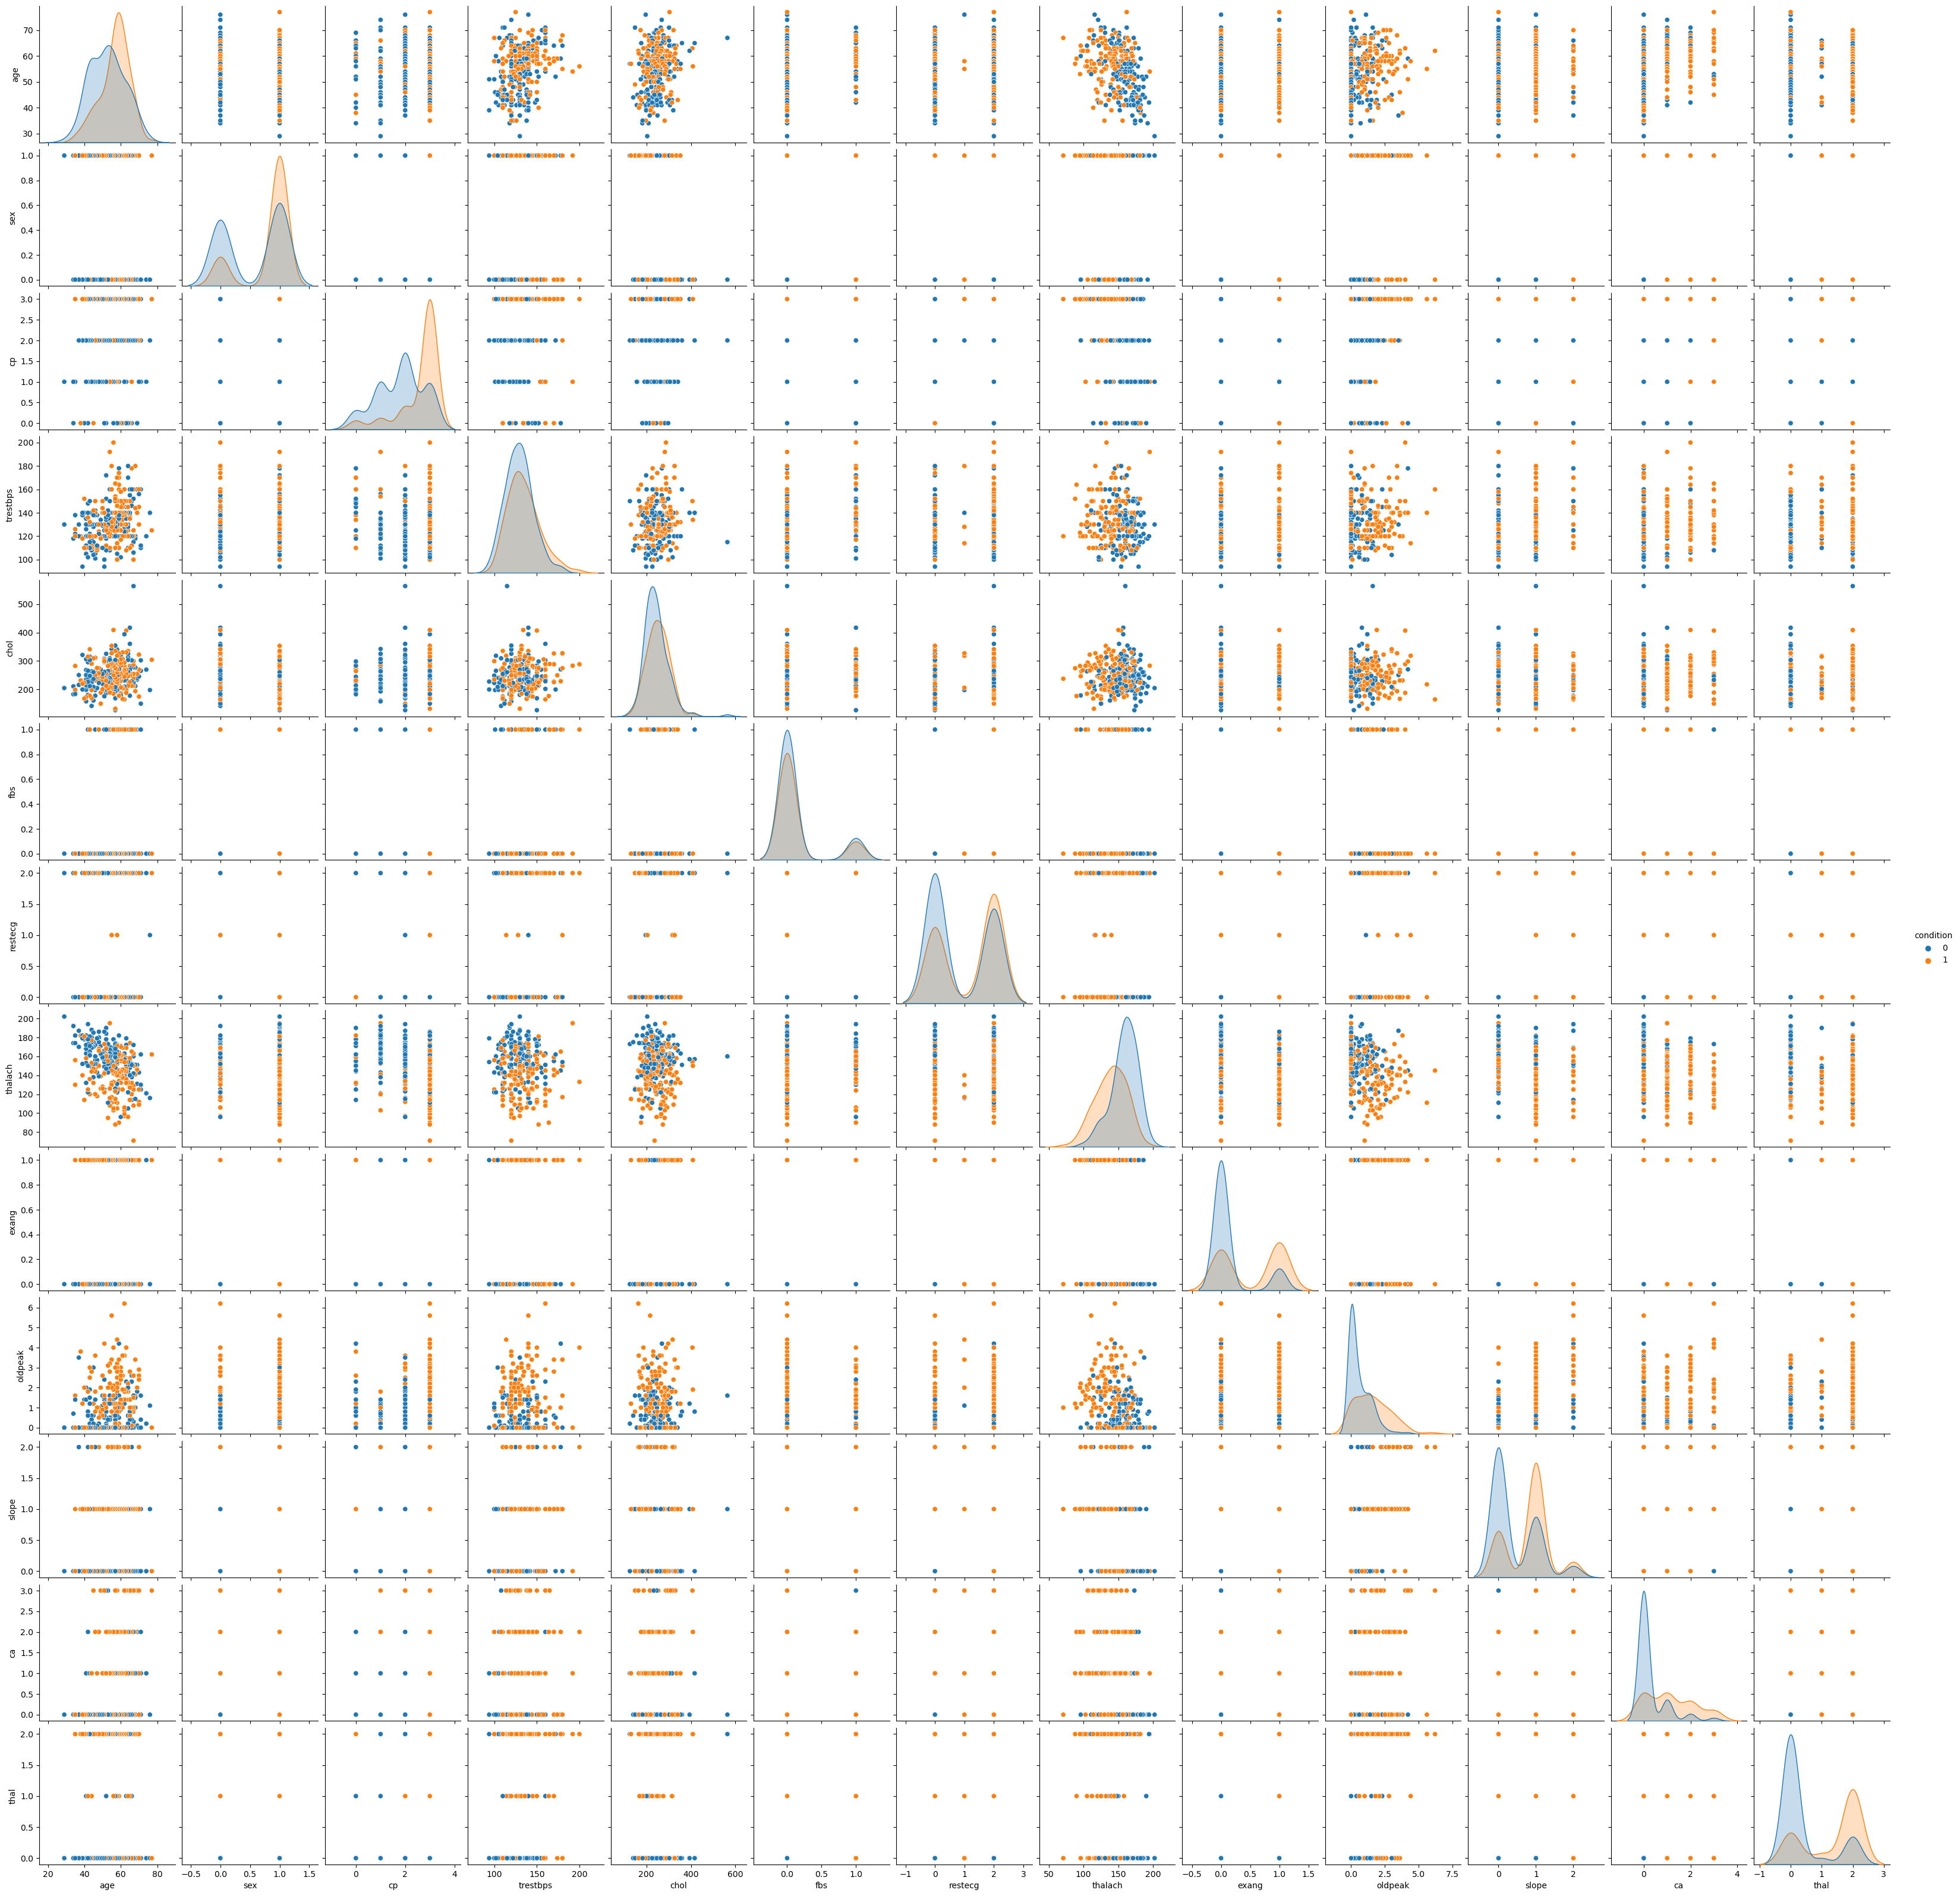

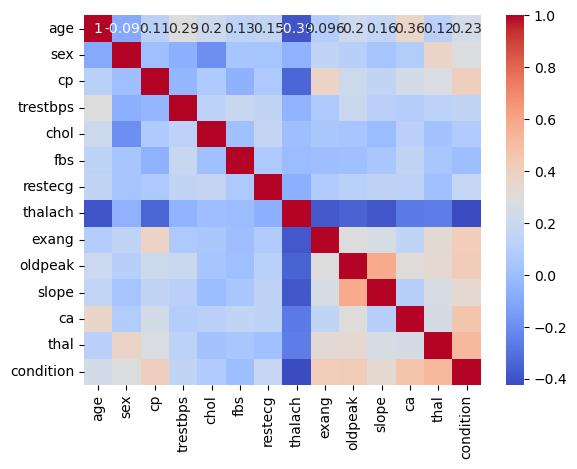

In [3]:
# analisis exploratorio de datos

# Ejemplos de visualizaciones y análisis estadísticos
sns.countplot(x='condition', data=data)
plt.show()

sns.pairplot(data, hue='condition')
plt.show()

# También podrías explorar correlaciones entre variables usando heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
#paso 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

#revision de datos faltantes 

print("cantidad de registros con cero en age: ",data['age'].isin([0]).sum())
print("cantidad de registros con cero en condition: ",data['condition'].isin([0]).sum())
print("cantidad de registros con cero en trestbps	: ",data['trestbps'].isin([0]).sum())

cantidad de registros con cero en age:  0
cantidad de registros con cero en condition:  160
cantidad de registros con cero en trestbps	:  0


In [9]:
# seleccion de caracteristicas 

# Dividir los datos en características (X) y variable objetivo (y)
X = data.drop('condition', axis=1)
y = data['condition']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Selección de características
selector = SelectFromModel(LogisticRegression())
selector.fit(X_scaled, y)
selected_features = X.columns[selector.get_support()]
X_selected = selector.transform(X_scaled)


In [10]:
# dividir el conjunto de datos 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [11]:
# entrenamiento del modelo 

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.7666666666666667
Precision: 0.7692307692307693
Recall: 0.7142857142857143
F1 Score: 0.7407407407407408


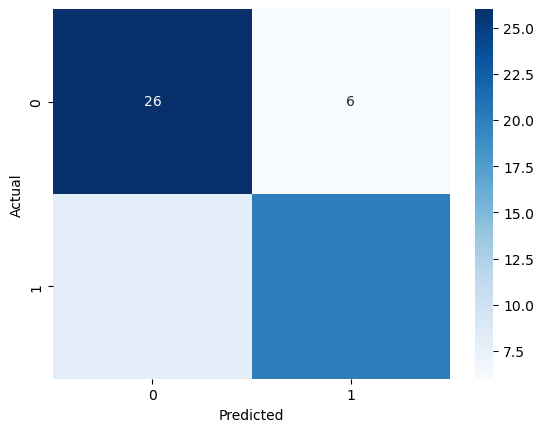

In [12]:
# evaluacion del modelo

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# También podrías visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

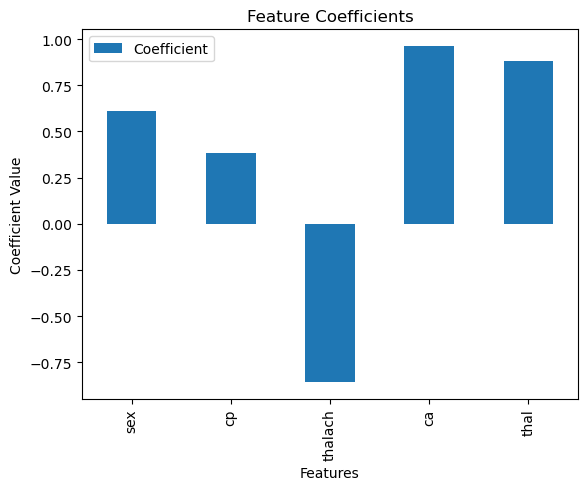

In [13]:
# visualizacion de resultados 

# Por ejemplo, podrías graficar las características seleccionadas y sus coeficientes
coeficients = pd.DataFrame(model.coef_.transpose(), index=selected_features, columns=['Coefficient'])
coeficients.plot(kind='bar')
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()